# NAME: TAIWO MUBARAK OLADAPO
    
DATASET LINK:https://archive.ics.uci.edu/ml/machine-learning-databases/00350/

In [1]:
# Importing the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import itertools
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score

In [2]:
# Loading the csv file

model2 = pd.read_csv("default of credit card clients.csv")
model2.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
model2.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [4]:
model2.shape

(30000, 25)

In [5]:
model2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [6]:
# Distribution of defaults

model2=model2.rename(columns={'default payment next month':'default'})
model2.default.value_counts()

0    23364
1     6636
Name: default, dtype: int64

In [7]:
# Checking for null values
model2.isnull().values.any()

False

In [8]:
model2["default"].describe

<bound method NDFrame.describe of 0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default, Length: 30000, dtype: int64>

In [9]:
# Checking the number of occurences of each class label

no_fraud = len(model2[model2.default == 0])
fraud = len(model2[model2.default == 1])
fraud_percentage = (fraud / (fraud + no_fraud)) * 100
print("Number of Genuine transactions: ", no_fraud)
print("Number of Fraud transactions: ", fraud)
print("Percentage of Fraud transactions: {:.4f}".format(fraud_percentage))

Number of Genuine transactions:  23364
Number of Fraud transactions:  6636
Percentage of Fraud transactions: 22.1200


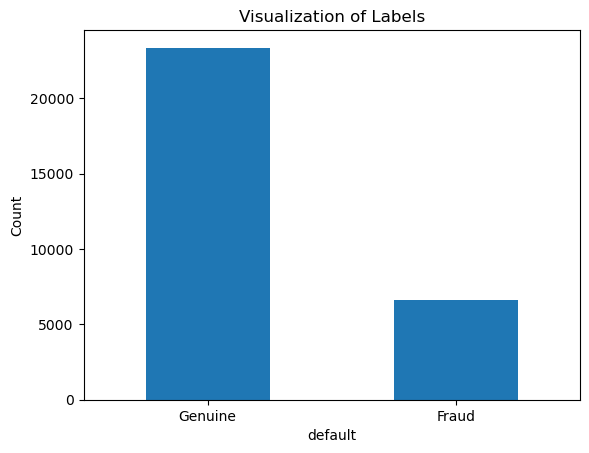

In [10]:
# Visualizing the label columns

labels = ["Genuine", "Fraud"]
count_classes = model2.value_counts(model2['default'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

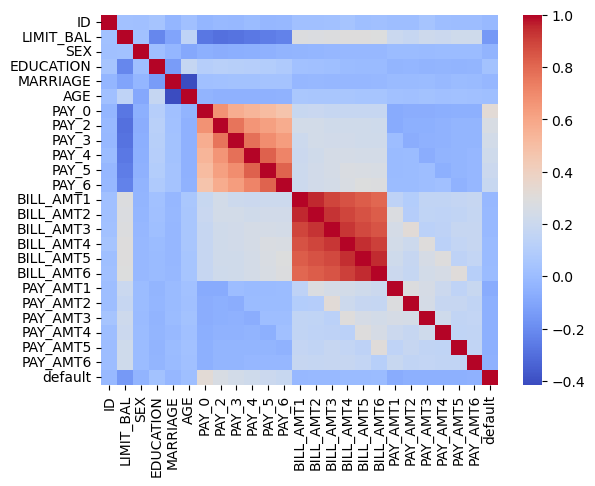

In [11]:
# calculate correlation matrix
correlation_matrix = model2.corr()

# plot correlation matrix
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.show()

In [12]:
target = model2[['default']]
features = model2.drop('default', axis=1)
final_data = pd.concat([features, target], axis=1)

In [13]:
scaler = StandardScaler()
model2["NormalizedID"] = scaler.fit_transform(model2["ID"].values.reshape(-1, 1))
model2.drop(["ID", "AGE"], inplace= True, axis= 1)
Y = model2["default"]
X = model2.drop(["default"], axis= 1)

In [14]:
(train_X, test_X, train_Y, test_Y) = train_test_split(X, Y, test_size= 0.3, random_state= 123)
Y = model2["default"]
X = model2.drop(["default"], axis= 1)
print("Shape of train_X: ", train_X.shape)
print("Shape of test_X: ", test_X.shape)

Shape of train_X:  (21000, 23)
Shape of test_X:  (9000, 23)


In [15]:
# Decision Tree
decision_tree = DecisionTreeClassifier()

# Random Forest
random_forest = RandomForestClassifier(n_estimators= 100)

# Logistic Regression
logistic_regression = LogisticRegression()

# Naive Bayes
naive_bayes = GaussianNB()

# SVM
support_vector_machine = SVC()

In [16]:
# Decision Tree
decision_tree.fit(train_X, train_Y)
predictions_dt = decision_tree.predict(test_X)
decision_tree_score = decision_tree.score(test_X, test_Y) * 100

In [17]:
# Random Forest
random_forest.fit(train_X, train_Y)
predictions_rf = random_forest.predict(test_X)
random_forest_score = random_forest.score(test_X, test_Y) * 100

In [18]:
# Logistic Regression
logistic_regression.fit(train_X, train_Y)
predictions_lr = logistic_regression.predict(test_X)
logistic_regression_score = logistic_regression.score(test_X, test_Y) * 100

In [19]:
# Naive Bayes
naive_bayes.fit(train_X, train_Y)
predictions_nb = naive_bayes.predict(test_X)
naive_bayes_score = naive_bayes.score(test_X, test_Y) * 100

In [20]:
# SVM
support_vector_machine.fit(train_X, train_Y)
predictions_svm = support_vector_machine.predict(test_X)
support_vector_machine_score = support_vector_machine.score(test_X, test_Y) * 100

In [21]:
print("Random Forest Score: ", random_forest_score)
print("Decision Tree Score: ", decision_tree_score)
print("Logistic Regression Score: ", logistic_regression_score)
print("Naive Bayes Score: ", naive_bayes_score)
print("SVM Score: ", support_vector_machine_score)

Random Forest Score:  81.5111111111111
Decision Tree Score:  73.07777777777777
Logistic Regression Score:  78.33333333333333
Naive Bayes Score:  36.37777777777777
SVM Score:  78.35555555555555


In [22]:
# The below function is directly taken from the scikit-learn website to plot the confusion matrix

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [23]:
confusion_matrix_dt = confusion_matrix(test_Y, predictions_dt.round())
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt)

Confusion Matrix - Decision Tree
[[5780 1272]
 [1151  797]]


Confusion matrix, without normalization


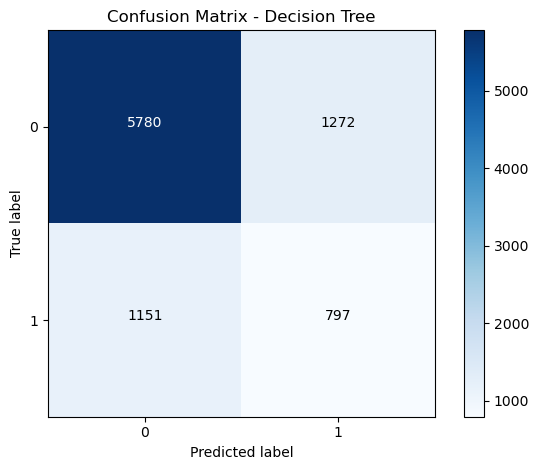

In [24]:
plot_confusion_matrix(confusion_matrix_dt, classes=[0, 1], title= "Confusion Matrix - Decision Tree")

In [25]:
# The function below prints the following necessary metrics
def metrics(actuals, predictions):
    print("Accuracy: {:.5f}".format(accuracy_score(actuals, predictions)))
    print("Precision: {:.5f}".format(precision_score(actuals, predictions)))
    print("Recall: {:.5f}".format(recall_score(actuals, predictions)))
    print("F1-score: {:.5f}".format(f1_score(actuals, predictions)))

In [26]:
print("Evaluation of Decision Tree Model")
print()
metrics(test_Y, predictions_dt.round())

Evaluation of Decision Tree Model

Accuracy: 0.73078
Precision: 0.38521
Recall: 0.40914
F1-score: 0.39681


In [27]:
confusion_matrix_rf = confusion_matrix(test_Y, predictions_rf.round())
print("Confusion Matrix - Random Forest")
print(confusion_matrix_rf)

Confusion Matrix - Random Forest
[[6605  447]
 [1217  731]]


Confusion matrix, without normalization


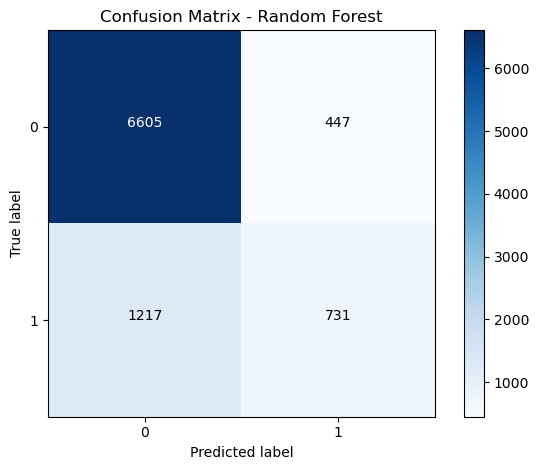

In [28]:
plot_confusion_matrix(confusion_matrix_rf, classes=[0, 1], title= "Confusion Matrix - Random Forest")

In [29]:
print("Evaluation of Random Forest Model")
print()
metrics(test_Y, predictions_rf.round())

Evaluation of Random Forest Model

Accuracy: 0.81511
Precision: 0.62054
Recall: 0.37526
F1-score: 0.46769


In [30]:
confusion_matrix_lr = confusion_matrix(test_Y, predictions_lr.round())
print("Confusion Matrix - Logistic Regression")
print(confusion_matrix_lr)

Confusion Matrix - Logistic Regression
[[7050    2]
 [1948    0]]


Confusion matrix, without normalization


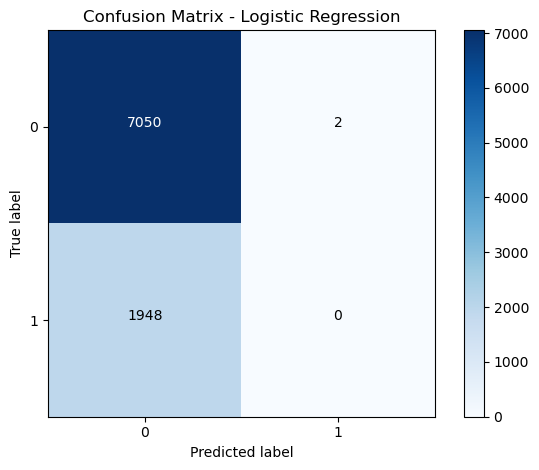

In [31]:
plot_confusion_matrix(confusion_matrix_lr, classes=[0, 1], title= "Confusion Matrix - Logistic Regression")

In [32]:
print("Evaluation of Logistic Regression Model")
print()
metrics(test_Y, predictions_lr.round())

Evaluation of Logistic Regression Model

Accuracy: 0.78333
Precision: 0.00000
Recall: 0.00000
F1-score: 0.00000


In [33]:
confusion_matrix_nb = confusion_matrix(test_Y, predictions_nb.round())
print("Confusion Matrix - Naive Bayes")
print(confusion_matrix_nb)

Confusion Matrix - Naive Bayes
[[1525 5527]
 [ 199 1749]]


Confusion matrix, without normalization


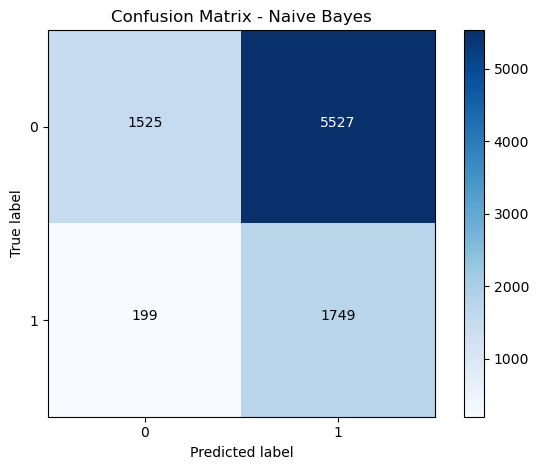

In [34]:
plot_confusion_matrix(confusion_matrix_nb, classes=[0, 1], title= "Confusion Matrix - Naive Bayes")

In [35]:
print("Evaluation of Naive Bayes Model")
print()
metrics(test_Y, predictions_nb.round())

Evaluation of Naive Bayes Model

Accuracy: 0.36378
Precision: 0.24038
Recall: 0.89784
F1-score: 0.37923


In [36]:
confusion_matrix_svm = confusion_matrix(test_Y, predictions_svm.round())
print("Confusion Matrix - Support Vector Machine")
print(confusion_matrix_svm)

Confusion Matrix - Support Vector Machine
[[7052    0]
 [1948    0]]


Confusion matrix, without normalization


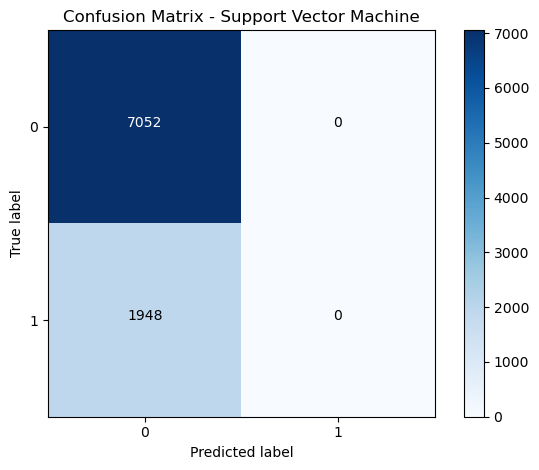

In [37]:
plot_confusion_matrix(confusion_matrix_svm, classes=[0, 1], title= "Confusion Matrix - Support Vector Machine")

In [38]:
print("Evaluation of Support Vector Machine Model")
print()
metrics(test_Y, predictions_svm.round())

Evaluation of Support Vector Machine Model

Accuracy: 0.78356
Precision: 0.00000
Recall: 0.00000
F1-score: 0.00000


/Users/macbookpro2019/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
